# Project Overview

You have been engaged as a Data Science consultant by a coal terminal. They would like you to investigate one of their heavy machines.

You have been supplied one month worth of data for all of their machines. The dataset shows what percentage of capacity for each machine was idle in any given hour. You are require to deliver an R list with the following components:

* Character: Machine name
* Vector: (Min, Mean, Max) utilization for the month (excluding unknown hours)
* Logical: Has utilization ever fallen below 90%? T/F
* Dataframe: For this machine
* Plot: For all machines

In this section we will cover:

1. How to handle date-times
2. What POSIXct time is
3. What a list is
4. Working with lists
5. Differences between [] [[]] and $
6. Subsetting a list
7. How to create a timeseries plot in R

In [41]:
util = read.csv("Machine-Utilization.csv")

In [42]:
head(util, 10)

Timestamp,Machine,Percent.Idle
01/09/2016 00:00,RL1,NA
01/09/2016 01:00,RL1,NA
01/09/2016 02:00,RL1,NA
01/09/2016 03:00,RL1,NA
01/09/2016 04:00,RL1,NA
01/09/2016 05:00,RL1,NA
01/09/2016 06:00,RL1,NA
01/09/2016 07:00,RL1,0.01994048
01/09/2016 08:00,RL1,0.01997024
01/09/2016 09:00,RL1,0.02119048


In [43]:
summary(util)

            Timestamp    Machine     Percent.Idle   
 01/09/2016 00:00:   5   RL1 :720   Min.   :0.0000  
 01/09/2016 01:00:   5   RL2 :720   1st Qu.:0.0262  
 01/09/2016 02:00:   5   SR1 :720   Median :0.0410  
 01/09/2016 03:00:   5   SR4A:720   Mean   :0.0431  
 01/09/2016 04:00:   5   SR6 :720   3rd Qu.:0.0576  
 01/09/2016 05:00:   5              Max.   :0.1508  
 (Other)         :3570              NA's   :361     

## Derive the 'Utilization' Column

In [44]:
util$Utilization = 1- util$Percent.Idle

In [45]:
head(util,10)

Timestamp,Machine,Percent.Idle,Utilization
01/09/2016 00:00,RL1,NA,NA
01/09/2016 01:00,RL1,NA,NA
01/09/2016 02:00,RL1,NA,NA
01/09/2016 03:00,RL1,NA,NA
01/09/2016 04:00,RL1,NA,NA
01/09/2016 05:00,RL1,NA,NA
01/09/2016 06:00,RL1,NA,NA
01/09/2016 07:00,RL1,0.01994048,0.9800595
01/09/2016 08:00,RL1,0.01997024,0.9800298
01/09/2016 09:00,RL1,0.02119048,0.9788095


# Handling the Date-Times

In [46]:
tail(util)

,Timestamp,Machine,Percent.Idle,Utilization
3595,30/09/2016 18:00,SR6,0.03485507,0.9651449
3596,30/09/2016 19:00,SR6,0.04605073,0.9539493
3597,30/09/2016 20:00,SR6,0.04427536,0.9557246
3598,30/09/2016 21:00,SR6,0.04141304,0.9585870
3599,30/09/2016 22:00,SR6,0.06750000,0.9325000
3600,30/09/2016 23:00,SR6,0.05355073,0.9464493


Notice the date is in DD / MM / YYYY 24:MM Format

There are two basic classes of date/times. Class "POSIXct" represents the (signed) number of seconds since the beginning of 1970 (in the UTC time zone) as a numeric vector.

In [47]:
util$PosixTime = as.POSIXct(util$Timestamp, format ="%d/%m/%Y %H:%M")

In [48]:
head(util,10)

Timestamp,Machine,Percent.Idle,Utilization,PosixTime
01/09/2016 00:00,RL1,NA,NA,2016-09-01 00:00:00
01/09/2016 01:00,RL1,NA,NA,2016-09-01 01:00:00
01/09/2016 02:00,RL1,NA,NA,2016-09-01 02:00:00
01/09/2016 03:00,RL1,NA,NA,2016-09-01 03:00:00
01/09/2016 04:00,RL1,NA,NA,2016-09-01 04:00:00
01/09/2016 05:00,RL1,NA,NA,2016-09-01 05:00:00
01/09/2016 06:00,RL1,NA,NA,2016-09-01 06:00:00
01/09/2016 07:00,RL1,0.01994048,0.9800595,2016-09-01 07:00:00
01/09/2016 08:00,RL1,0.01997024,0.9800298,2016-09-01 08:00:00
01/09/2016 09:00,RL1,0.02119048,0.9788095,2016-09-01 09:00:00


In [49]:
summary(util)

            Timestamp    Machine     Percent.Idle     Utilization    
 01/09/2016 00:00:   5   RL1 :720   Min.   :0.0000   Min.   :0.8492  
 01/09/2016 01:00:   5   RL2 :720   1st Qu.:0.0262   1st Qu.:0.9424  
 01/09/2016 02:00:   5   SR1 :720   Median :0.0410   Median :0.9590  
 01/09/2016 03:00:   5   SR4A:720   Mean   :0.0431   Mean   :0.9569  
 01/09/2016 04:00:   5   SR6 :720   3rd Qu.:0.0576   3rd Qu.:0.9738  
 01/09/2016 05:00:   5              Max.   :0.1508   Max.   :1.0000  
 (Other)         :3570              NA's   :361      NA's   :361     
   PosixTime                  
 Min.   :2016-09-01 00:00:00  
 1st Qu.:2016-09-08 11:45:00  
 Median :2016-09-15 23:30:00  
 Mean   :2016-09-15 23:30:00  
 3rd Qu.:2016-09-23 11:15:00  
 Max.   :2016-09-30 23:00:00  
                              

## Let's rearrange some things

In [50]:
util$Timestamp = NULL

In [51]:
util = util[,c(4,1,2,3)]

In [52]:
head(util,10)

PosixTime,Machine,Percent.Idle,Utilization
2016-09-01 00:00:00,RL1,NA,NA
2016-09-01 01:00:00,RL1,NA,NA
2016-09-01 02:00:00,RL1,NA,NA
2016-09-01 03:00:00,RL1,NA,NA
2016-09-01 04:00:00,RL1,NA,NA
2016-09-01 05:00:00,RL1,NA,NA
2016-09-01 06:00:00,RL1,NA,NA
2016-09-01 07:00:00,RL1,0.01994048,0.9800595
2016-09-01 08:00:00,RL1,0.01997024,0.9800298
2016-09-01 09:00:00,RL1,0.02119048,0.9788095


# Wait, what's a list?

In [53]:
RL1 = util[util$Machine == "RL1",]

In [54]:
RL1$Machine = factor(RL1$Machine)

In [55]:
summary(RL1)

   PosixTime                   Machine    Percent.Idle      Utilization    
 Min.   :2016-09-01 00:00:00   RL1:720   Min.   :0.00500   Min.   :0.8492  
 1st Qu.:2016-09-08 11:45:00             1st Qu.:0.03208   1st Qu.:0.9403  
 Median :2016-09-15 23:30:00             Median :0.04613   Median :0.9539  
 Mean   :2016-09-15 23:30:00             Mean   :0.04830   Mean   :0.9517  
 3rd Qu.:2016-09-23 11:15:00             3rd Qu.:0.05967   3rd Qu.:0.9679  
 Max.   :2016-09-30 23:00:00             Max.   :0.15077   Max.   :0.9950  
                                         NA's   :7         NA's   :7       

## Constructing the list

* Character: Machine name
* Vector: (Min, Mean, Max) utilization for the month (excluding unknown hours)
* Logical: Has utilization ever fallen below 90%? T/F

In [56]:
# Vector
util_stats_rl1 = c(min(RL1$Utilization, na.rm=T),
                mean((RL1$Utilization), na.rm =T),
                max((RL1$Utilization), na.rm =T))

In [57]:
# Logical
util_under_90_flag = length(which(RL1$Utilization < .90))>0
util_under_90_flag

[1] TRUE

In [58]:
list_rl1 = list("RL1", util_stats_rl1, util_under_90_flag)
list_rl1

[[1]]
[1] "RL1"

[[2]]
[1] 0.8492262 0.9516976 0.9950000

[[3]]
[1] TRUE

# Naming Components of a list

In [59]:
names(list_rl1) = c("Machine", "Stats; Min,Mean,Max", "Low Threshold")
list_rl1

$Machine
[1] "RL1"

$`Stats; Min,Mean,Max`
[1] 0.8492262 0.9516976 0.9950000

$`Low Threshold`
[1] TRUE

# Extracting components of a list

1. [] - will always return a list
2. [[]] - will always return the actual object
3. $ - same as [[]] but prettier

In [60]:
list_rl1[1]

$Machine
[1] "RL1"

In [61]:
list_rl1[[1]]

[1] "RL1"

In [62]:
list_rl1$Machine

[1] "RL1"

In [63]:
list_rl1[2]

$`Stats; Min,Mean,Max`
[1] 0.8492262 0.9516976 0.9950000

In [64]:
typeof(list_rl1[2])

[1] "list"

In [65]:
list_rl1$Stats

[1] 0.8492262 0.9516976 0.9950000

In [66]:
typeof(list_rl1$Stats)

[1] "double"

## Accessing elements of an embedded list

In [67]:
list_rl1[[2]][3]

[1] 0.995

# Adding and deleting components

In [68]:
list_rl1[4] = "New info"
list_rl1

$Machine
[1] "RL1"

$`Stats; Min,Mean,Max`
[1] 0.8492262 0.9516976 0.9950000

$`Low Threshold`
[1] TRUE

[[4]]
[1] "New info"


In [69]:
list_rl1$UnknownHours = RL1[is.na(RL1$Utilization),"PosixTime"]
list_rl1

$Machine
[1] "RL1"

$`Stats; Min,Mean,Max`
[1] 0.8492262 0.9516976 0.9950000

$`Low Threshold`
[1] TRUE

[[4]]
[1] "New info"

$UnknownHours
[1] "2016-09-01 00:00:00 PDT" "2016-09-01 01:00:00 PDT"
[3] "2016-09-01 02:00:00 PDT" "2016-09-01 03:00:00 PDT"
[5] "2016-09-01 04:00:00 PDT" "2016-09-01 05:00:00 PDT"
[7] "2016-09-01 06:00:00 PDT"


## Remove an item

In [70]:
list_rl1[4] = NULL
list_rl1

$Machine
[1] "RL1"

$`Stats; Min,Mean,Max`
[1] 0.8492262 0.9516976 0.9950000

$`Low Threshold`
[1] TRUE

$UnknownHours
[1] "2016-09-01 00:00:00 PDT" "2016-09-01 01:00:00 PDT"
[3] "2016-09-01 02:00:00 PDT" "2016-09-01 03:00:00 PDT"
[5] "2016-09-01 04:00:00 PDT" "2016-09-01 05:00:00 PDT"
[7] "2016-09-01 06:00:00 PDT"


Numeration has shifted. Note this!

## The df

In [71]:
list_rl1$Data = RL1
summary(list_rl1)

                    Length Class      Mode     
Machine             1      -none-     character
Stats; Min,Mean,Max 3      -none-     numeric  
Low Threshold       1      -none-     logical  
UnknownHours        7      POSIXct    numeric  
Data                4      data.frame list     

# Subsetting a list

In [72]:
sublist_rl1 = list_rl1[c("Machine", "Stats; Min,Mean,Max")]
sublist_rl1
# How to get the mean?
sublist_rl1[[2]][2]

$Machine
[1] "RL1"

$`Stats; Min,Mean,Max`
[1] 0.8492262 0.9516976 0.9950000

[1] 0.9516976

# Creating a time-series plot

Warning message:
"Removed 155 rows containing missing values (geom_path)."

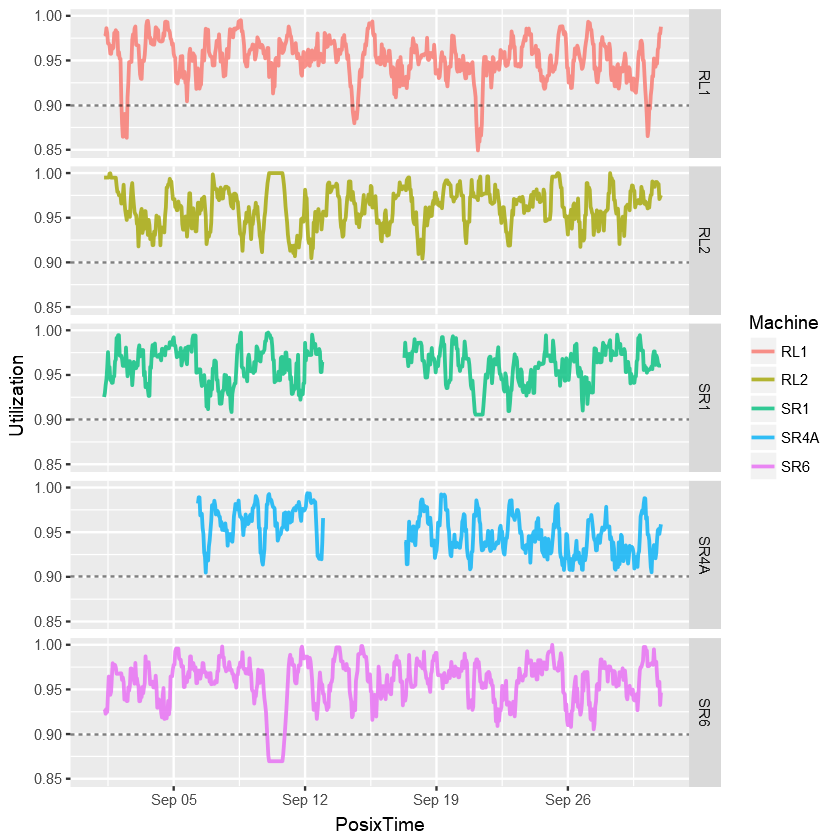

In [95]:
library(ggplot2)
p = ggplot(data=util)
my_plot = p + geom_line(aes(x=PosixTime, y=Utilization,
               colour=Machine), size = .8, alpha = .8)+
    facet_grid(Machine~.)+
    geom_hline(yintercept = .90,
              colour = "Black", size = .5,
              linetype=2, alpha = .5)
my_plot

In [96]:
list_rl1$Plot = my_plot

In [97]:
summary(list_rl1)

                    Length Class      Mode     
Machine             1      -none-     character
Stats; Min,Mean,Max 3      -none-     numeric  
Low Threshold       1      -none-     logical  
UnknownHours        7      POSIXct    numeric  
Data                4      data.frame list     
Plot                9      gg         list     

Now you have a list of all the details to recreate the plot!